<a href="https://colab.research.google.com/github/Mano2610/CE888/blob/main/Lab/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
  import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [85]:
len(df.columns.to_list())

21

In [72]:
from sklearn.preprocessing import LabelEncoder

df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [73]:
df = pd.get_dummies(df)
df.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [74]:
df.drop("duration", axis=1, inplace=True)

In [75]:
len(df.columns.to_list())

63

In [41]:
df.isnull().any().sum()

0

In [42]:
df.dropna()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [82]:
df.shape

(41188, 63)

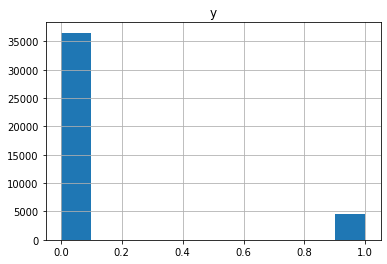

In [43]:
df.hist('y')
plt.show()

In [44]:
rows = df.shape[0]
a = df[df["y"]==0].shape[0]
b = df[df["y"]==1].shape[0]

In [45]:
print(f"Imbalance data : \n value:0---{a/rows:.2%}\n value:1---{b/rows:.2%}")

Imbalance data : 
 value:0---88.73%
 value:1---11.27%


In [46]:
from sklearn.model_selection import train_test_split

x = df.drop("y", axis=1)
y = df["y"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50, stratify=y.values)

In [47]:
n_train = y_train.shape[0]
train_value0 = np.where(y_train == 0)[0].shape[0]
train_value1 = np.where(y_train == 1)[0].shape[0]
print('Training data:')
print(f'value:0---{train_value0/n_train}')
print(f'value:1---{train_value1/n_train}')

Training data:
value:0---0.8873444613050075
value:1---0.11265553869499241


In [48]:
n_test = y_test.shape[0]
test_value0 = np.where(y_test == 0)[0].shape[0]
test_value1 = np.where(y_test == 1)[0].shape[0]
print('\nTesting data:')
print(f'value:0---{test_value0/n_test:.2%}')
print(f'value:1---{test_value1/n_test:.2%}')


Testing data:
value:0---88.74%
value:1---11.26%


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=3, n_estimators=100)
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring="f1")
print("Accuracy: ", scores.mean())

Accuracy:  0.24441115121858706


In [50]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='stratified')
scores1 = cross_val_score(dummy_clf, x_train, y_train, cv=10, scoring="f1")
print("Accuracy: ", scores1.mean())

Accuracy:  0.11588971299229242


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 100, 200],
    'criterion': ['gini','entropy'],
    'max_depth': [3,5,7],
}
search = GridSearchCV(RandomForestClassifier(), param_grid)
search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [52]:
f1_score(y_train, search.predict(x_train))

0.3090441491641663

In [53]:
print(search.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 200}


In [54]:
print("Accuracy: ",search.best_score_)

Accuracy:  0.8995144157814872


In [55]:
importances = search.best_estimator_.feature_importances_
features = list(x_train.columns.values)
indices = np.argsort(importances)[::-1]

print("Top 3 features:")

for f in range(3):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

Top 3 features:
1. euribor3m (0.178262)
2. nr.employed (0.160799)
3. pdays (0.112066)


In [56]:
from sklearn.metrics import f1_score
scores2 = f1_score(y_test, search.predict(x_test))
print(f"Generalization = {scores2:.2%}")

Generalization = 31.93%


# QUIZ


In [57]:
df_ = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter=';')
df_.shape

(41188, 21)

In [63]:
num_cols = df_.columns.to_list()
len(num_cols)

21

In [62]:
num_cols = df_.select_dtypes(include=np.number).columns.tolist()
len(num_cols)

10

In [97]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8)
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
print("Forest Training F1: ", scores.mean())

Forest Training F1:  0.30672991945036887


In [98]:
clf = RandomForestClassifier(n_estimators=150, max_depth=6)
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
print("Forest Training F1: " , scores.mean())

Forest Training F1:  0.28285105998774446


In [66]:
clf = RandomForestClassifier(n_estimators=200, max_depth=8)
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
print("Forest Training F1: " , scores.mean())

Forest Training F1:  0.2990220239262847


In [99]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=60)
clf.fit(x_train, y_train)
print("Generalization F1 = %.2f" % f1_score(y_test, clf.predict(x_test)))

Generalization F1 = 0.34


In [96]:
clf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=60)
clf.fit(x_train, y_train)

# Get most important features
importances = clf.feature_importances_
features = list(x_train.columns.values)
indices = np.argsort(importances)[::-1]

print("Top 3 features:")

for f in range(3):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

Top 3 features:
1. euribor3m (0.148393)
2. nr.employed (0.113660)
3. poutcome_success (0.076603)
